In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
COVID_DATA_FOLDER = './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports'
covid_data = pd.read_csv(f'{COVID_DATA_FOLDER}/07-24-2020.csv')

In [6]:
covid_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-25 04:47:39,34.223334,-82.461707,260,2,0,258.0,"Abbeville, South Carolina, US",1060.056265,0.769231
1,22001.0,Acadia,Louisiana,US,2020-07-25 04:47:39,30.295065,-92.414197,2111,62,0,2049.0,"Acadia, Louisiana, US",3402.369248,2.936997
2,51001.0,Accomack,Virginia,US,2020-07-25 04:47:39,37.767072,-75.632346,1059,15,0,1044.0,"Accomack, Virginia, US",3277.014482,1.416431
3,16001.0,Ada,Idaho,US,2020-07-25 04:47:39,43.452658,-116.241552,6732,45,0,6687.0,"Ada, Idaho, US",1397.878265,0.668449
4,19001.0,Adair,Iowa,US,2020-07-25 04:47:39,41.330756,-94.471059,20,0,0,20.0,"Adair, Iowa, US",279.642058,0.000000


In [7]:
processed_covid_data = covid_data.loc[:,('Country_Region', 'Confirmed')]
processed_covid_data = processed_covid_data.groupby('Country_Region').sum()
processed_covid_data.head()

,Confirmed
Country_Region,
Afghanistan,35981
Albania,4570
Algeria,26159
Andorra,897
Angola,880


In [8]:
covid_countries = processed_covid_data['Country_Region'].unique()
covid_countries.sort()
covid_countries

KeyError: 'Country_Region'

In [9]:
POP_DATA_FILE = './population/data/population.csv'
pop_data = pd.read_csv(POP_DATA_FILE)

In [10]:
pop_data.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760


In [11]:
COUNTRY_MAP = {'United States': 'US'}
processed_pop_data = pop_data[pop_data['Year']==2018]
processed_pop_data.loc[:,'Country_Region'] = processed_pop_data.loc[:,'Country Name'].apply(lambda x: COUNTRY_MAP[x] if x in COUNTRY_MAP else x)
processed_pop_data.loc[:,:] = processed_pop_data.loc[:,('Country_Region', 'Value')]

/home/patrick/miniconda3/envs/covid/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/patrick/miniconda3/envs/covid/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
pop_countries = processed_pop_data['Country_Region'].unique()
pop_countries.sort()
pop_countries

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacif

In [13]:
reportable_countries = set(pop_countries) & set(covid_countries)
reportable_countries

NameError: name 'covid_countries' is not defined

In [14]:
'US' in pop_countries

True

In [15]:
data = pd.merge(processed_covid_data, processed_pop_data, on='Country_Region')
processed_data = data
processed_data['Percent Population Confirmed'] = processed_data['Confirmed']/processed_data['Value']*100
top_25 = processed_data.sort_values('Percent Population Confirmed', ascending=False)[:25]

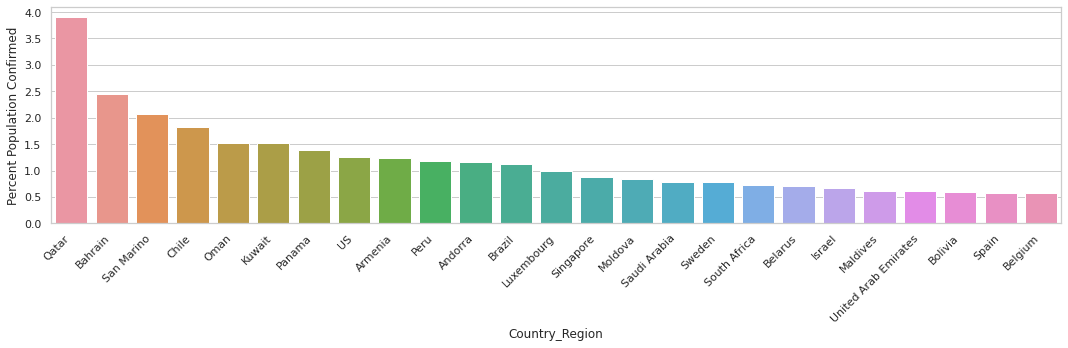

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
g = sns.barplot(x="Country_Region", y="Percent Population Confirmed", data=top_25)
_ = g.set_xticklabels(top_25['Country_Region'], rotation=45, ha='right')
plt.tight_layout()
plt.savefig('percents.png')